In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')

# Import data
from src_experiment import get_new_moons_data_for_all_noises

# Import storage path
from src_experiment.paths import get_test_moon_path

# Import model
from src_experiment import get_model

# Import train model
from src_experiment import train_model

In [2]:
def plot_training(res):
    ax = res[["train_loss", "test_loss"]].plot(
        figsize=(10, 10),
        color=["blue", "blue"],
        style=["-", "--"],
        ylabel="Loss",
    )

    ax2 = res[["train_accuracy", "test_accuracy"]].plot(
        ax=ax,
        secondary_y=True,
        color=["red", "red"],
        style=["-", "--"],
    )

    ax.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    # Fix legends (pandas splits them)
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc="center right")

    plt.show()
    
def plot_results_on_ax(res, ax, title=None):
    res[["train_loss", "test_loss"]].plot(
        ax=ax, style=["-", "--"], legend=False
    )

    ax_acc = ax.twinx()
    res[["train_accuracy", "test_accuracy"]].plot(
        ax=ax_acc, style=["-", "--"], legend=False
    )

    ax.set(xlabel="Epochs", ylabel="Loss", title=title)
    ax_acc.set_ylabel("Accuracy")

    return ax, ax_acc


def plot_all_results(results, titles=None, run_number=0):
    fig, axes = plt.subplots(2, 3, figsize=(14, 7))
    axes = axes.ravel()

    acc_axes = []

    for i, res in enumerate(results):
        _, ax_acc = plot_results_on_ax(
            res,
            axes[i],
            None if titles is None else titles[i],
        )
        acc_axes.append(ax_acc)

    # Legend from first subplot (both y-axes)
    lines = axes[0].lines + acc_axes[0].lines
    labels = ["Train loss", "Test loss", "Train acc", "Test acc"]

    fig.legend(lines, labels, loc="upper left", ncol=4)

    plt.tight_layout(rect=[0, 0, 1, 0.93])
    fig.suptitle(f"Run number: {run_number}")
    plt.show()



In [3]:
model_name = "small"
noise_level = 0.05
run_number = 0

def get_frame_to_plot(model_name=model_name, dataset_name="new", noise_level=noise_level, run_number=run_number):
    path = get_test_moon_path(model_name, dataset_name, noise_level, run_number)
    df = pd.read_csv(path / "run_summary.csv")
    return df

In [4]:
def plot_for_a_run(run_number):
    results = []
    for noise in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]:
        results.append(get_frame_to_plot(model_name=model_name,noise_level=noise, run_number=run_number))
    plot_all_results(
        results,
        titles=[f"Noise = {n}" for n in [0.05, 0.1, 0.15, 0.2, 0.3, 0.5]],
        run_number=run_number)

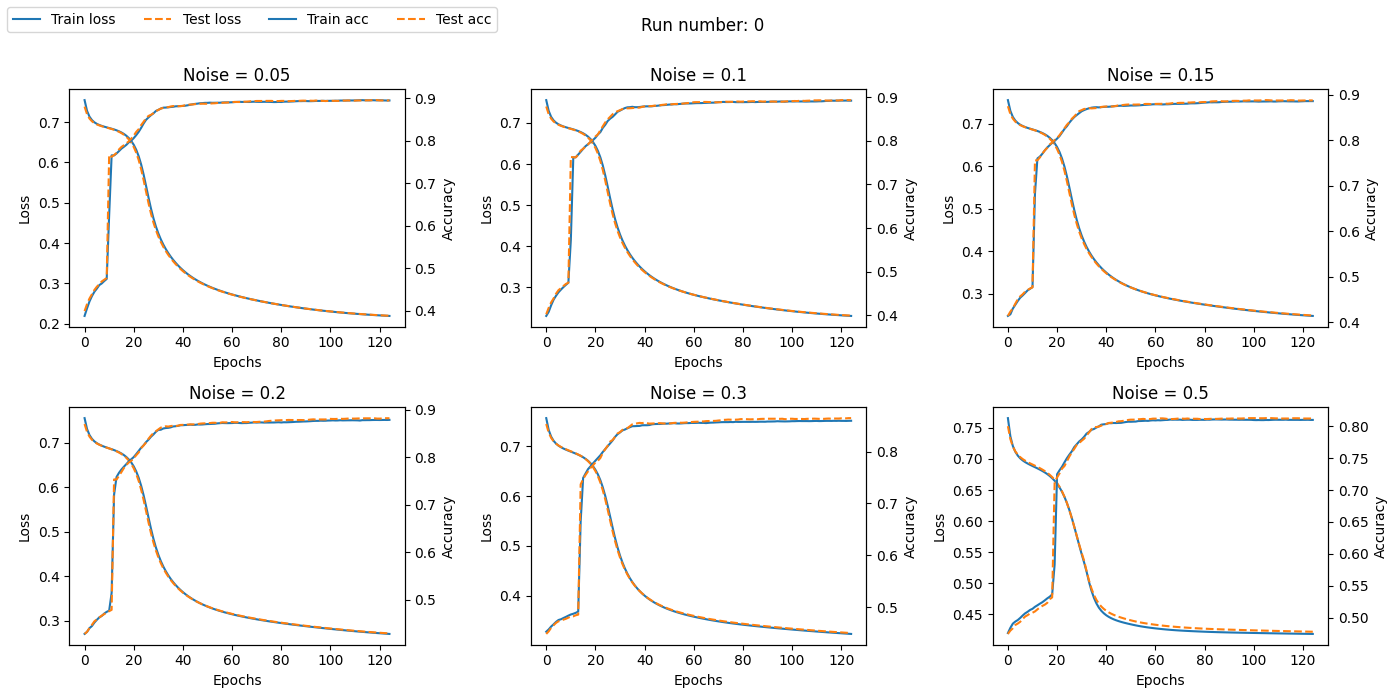

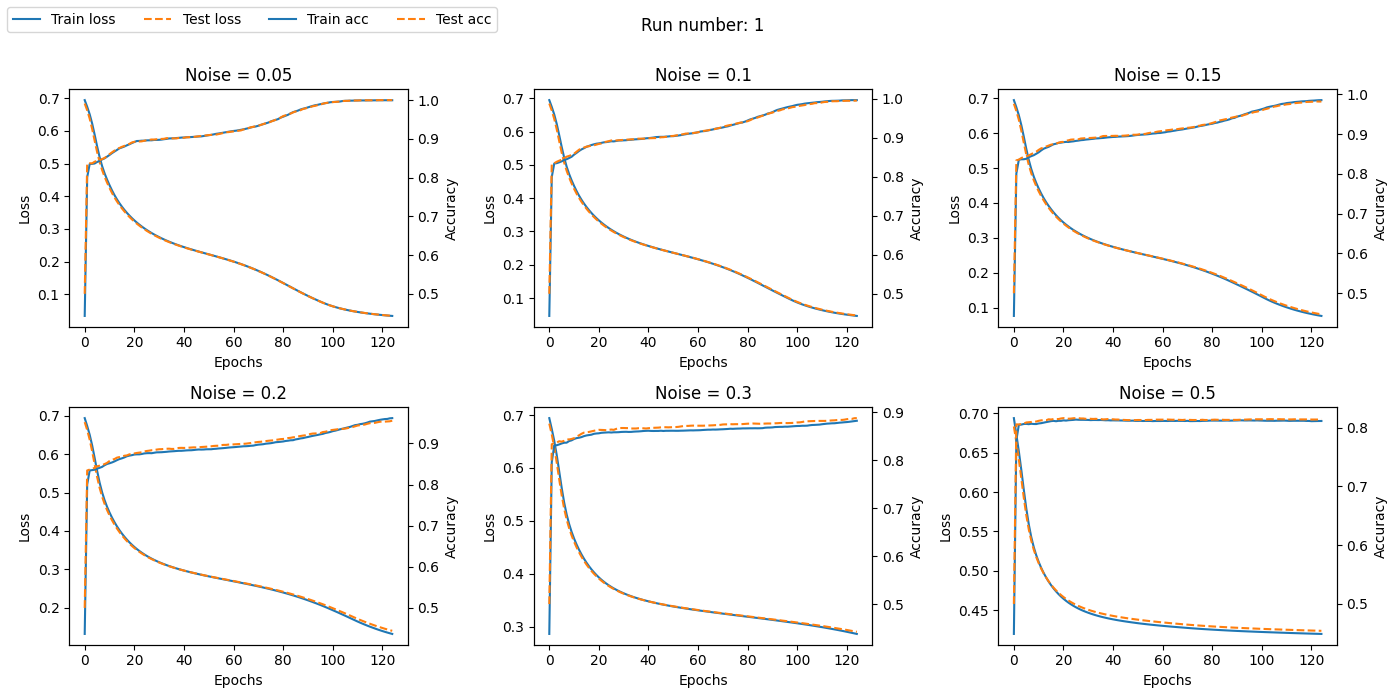

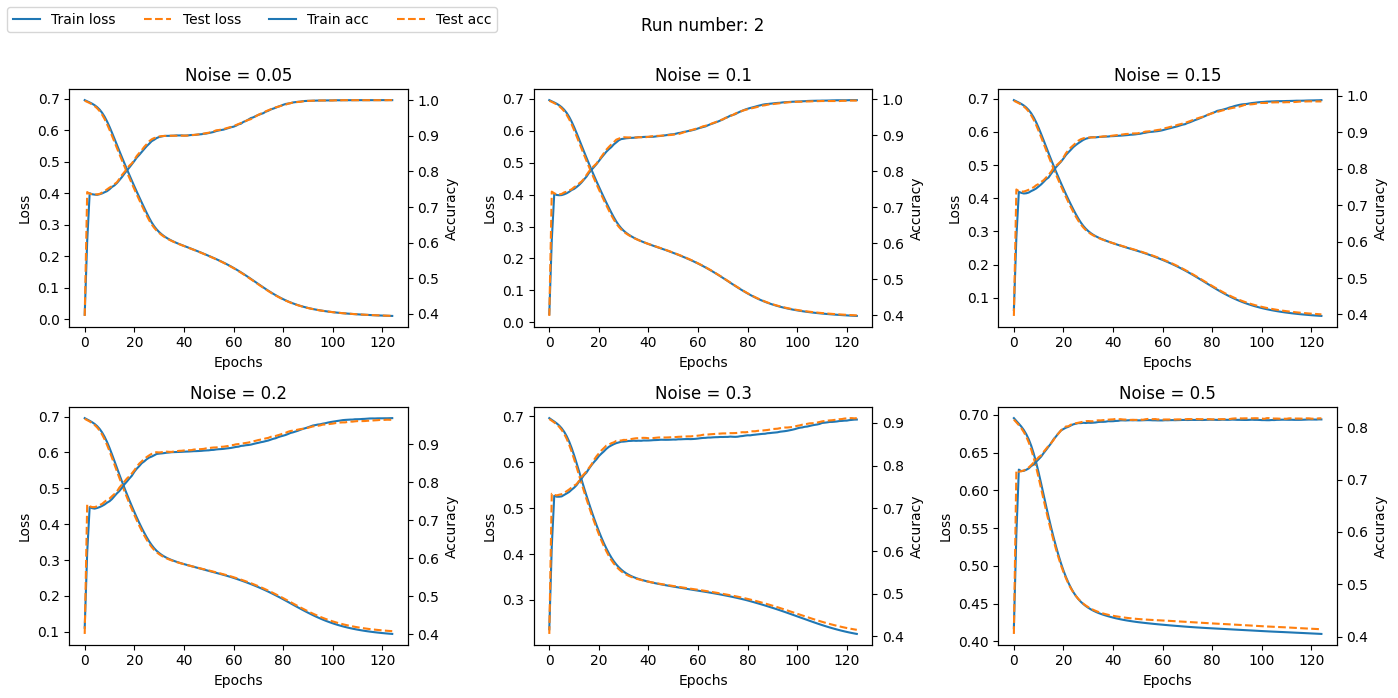

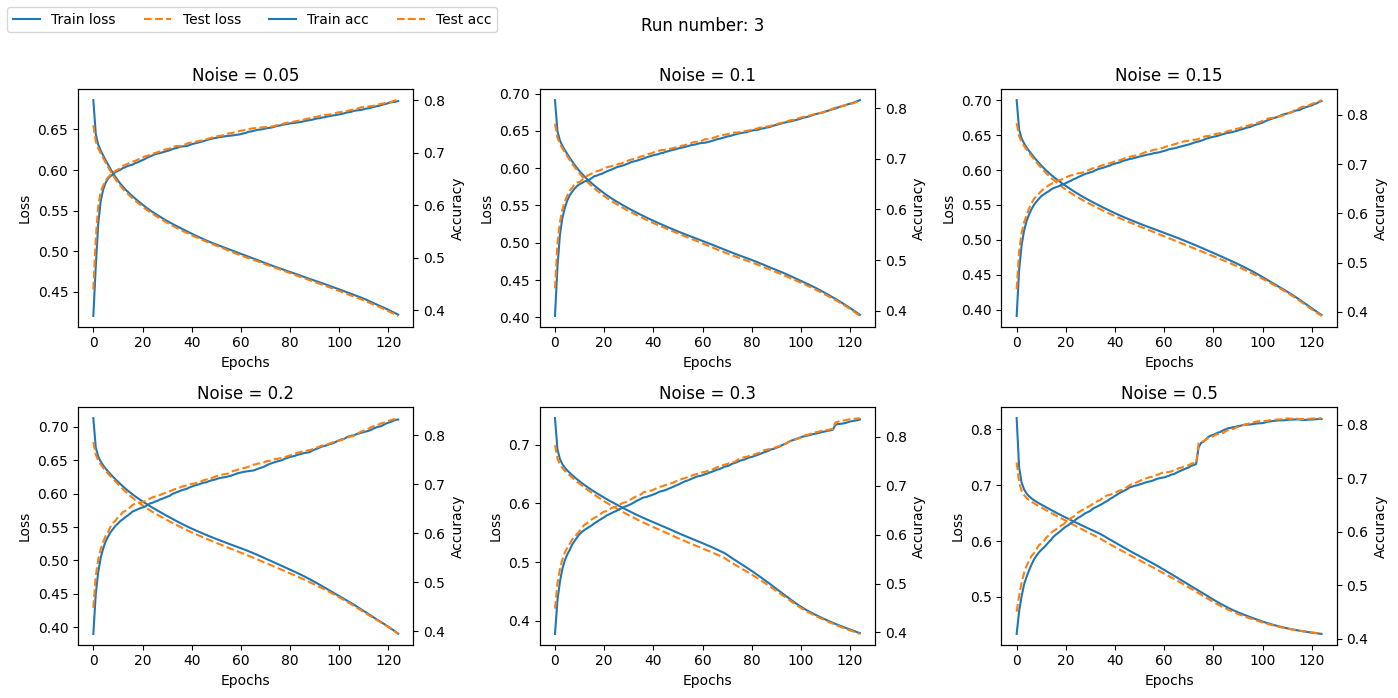

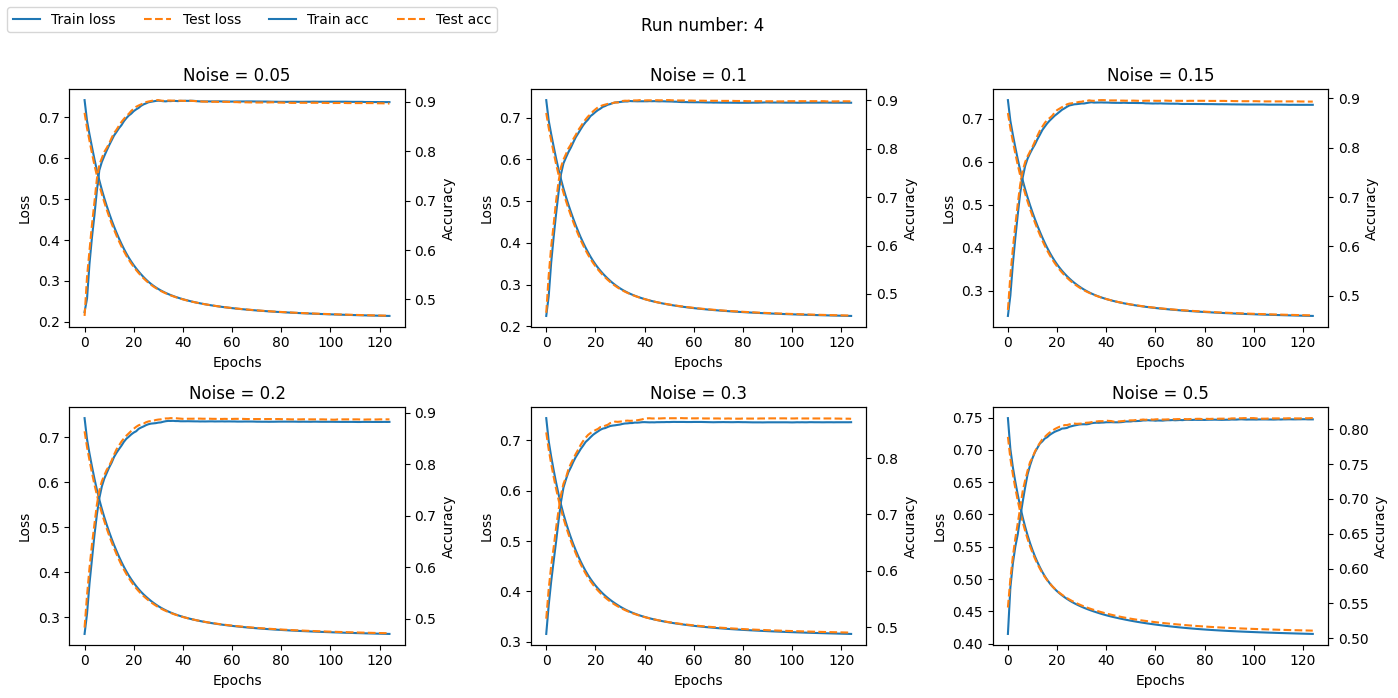

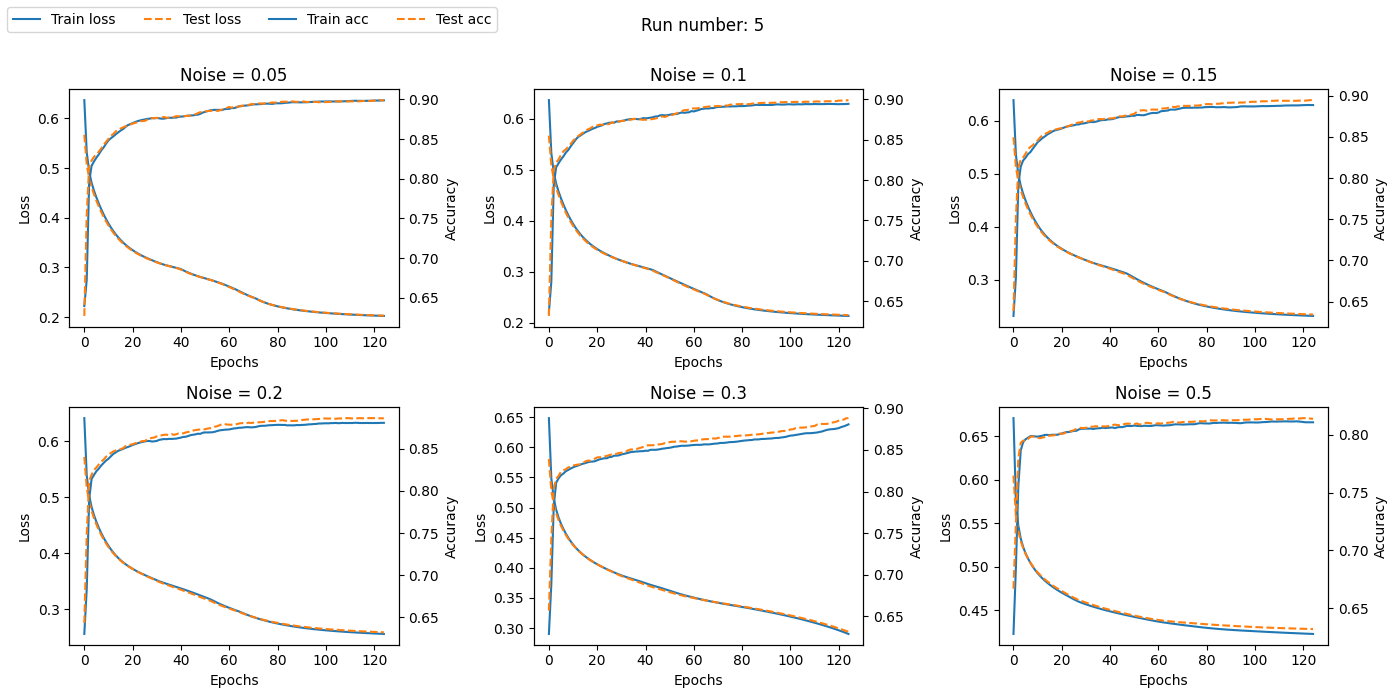

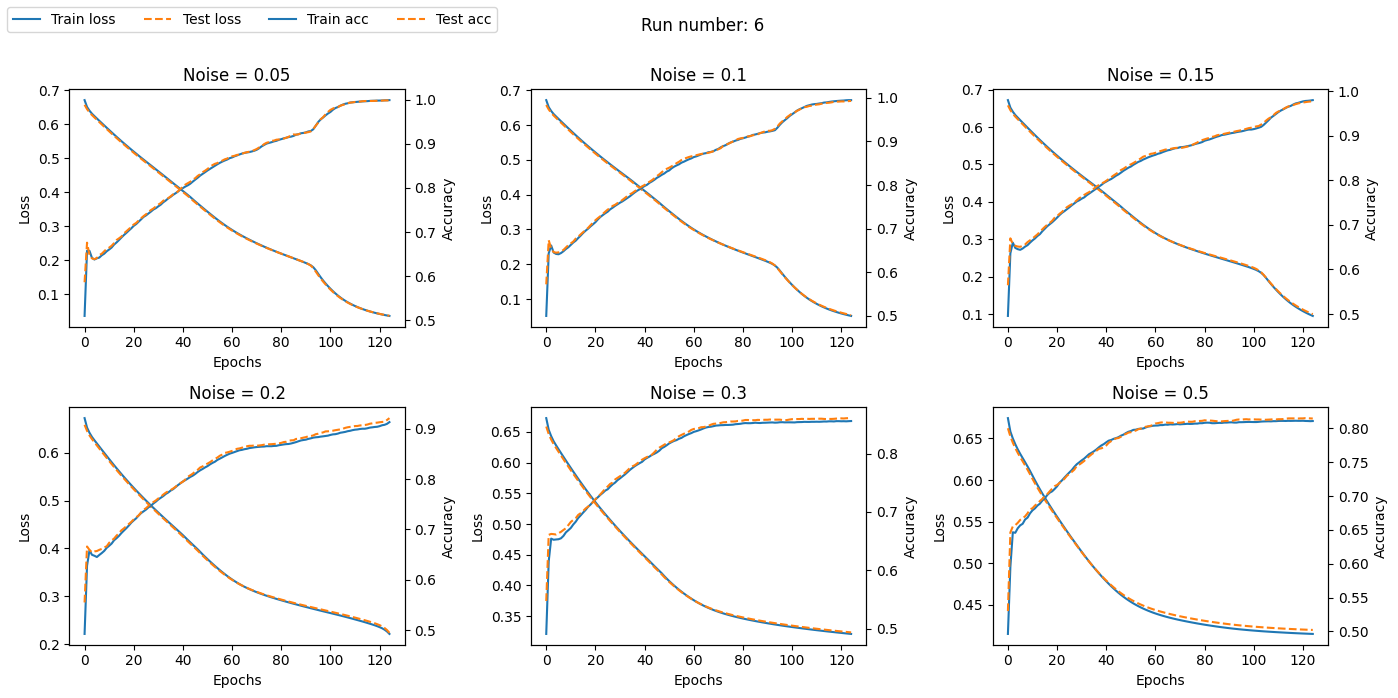

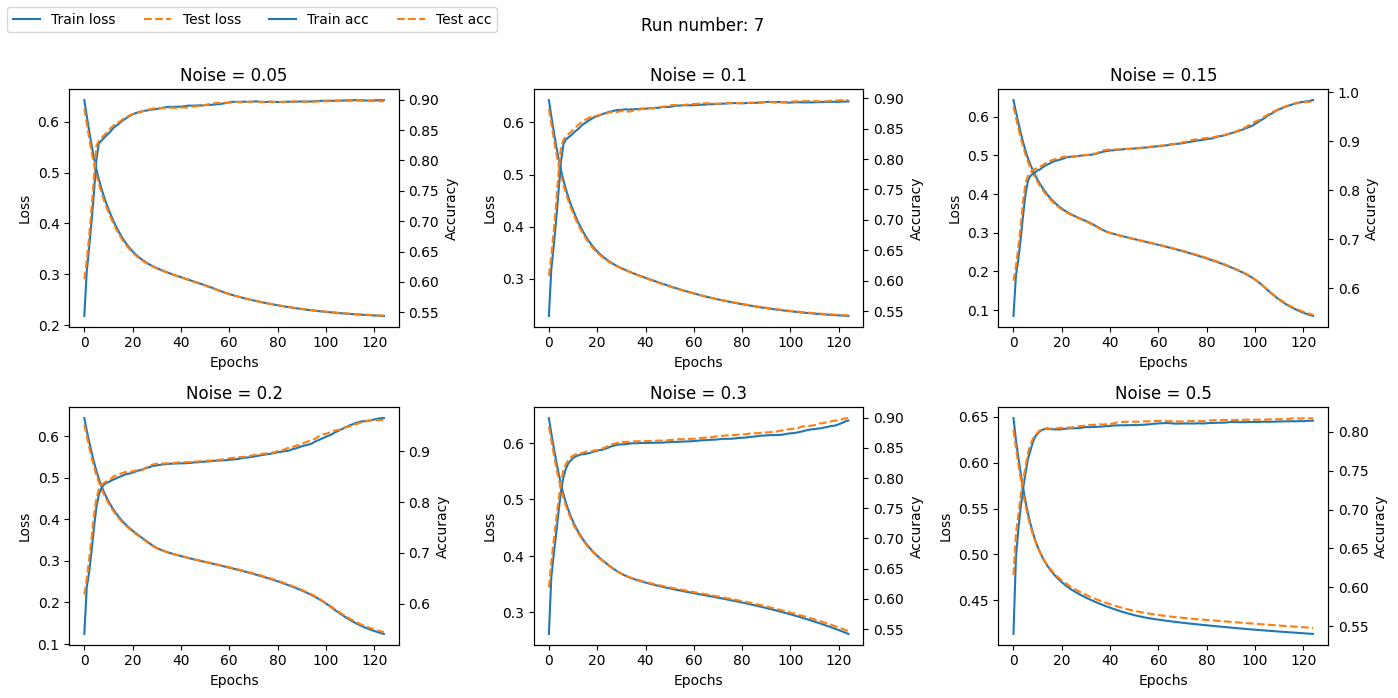

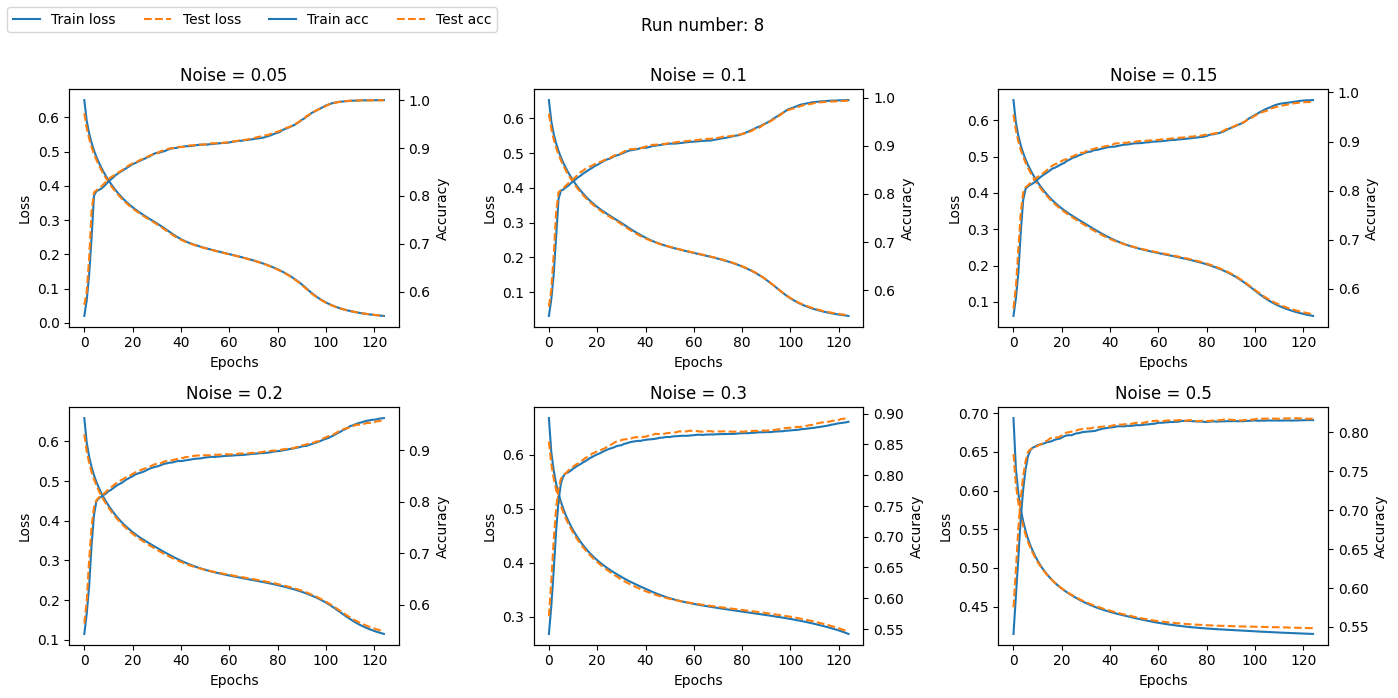

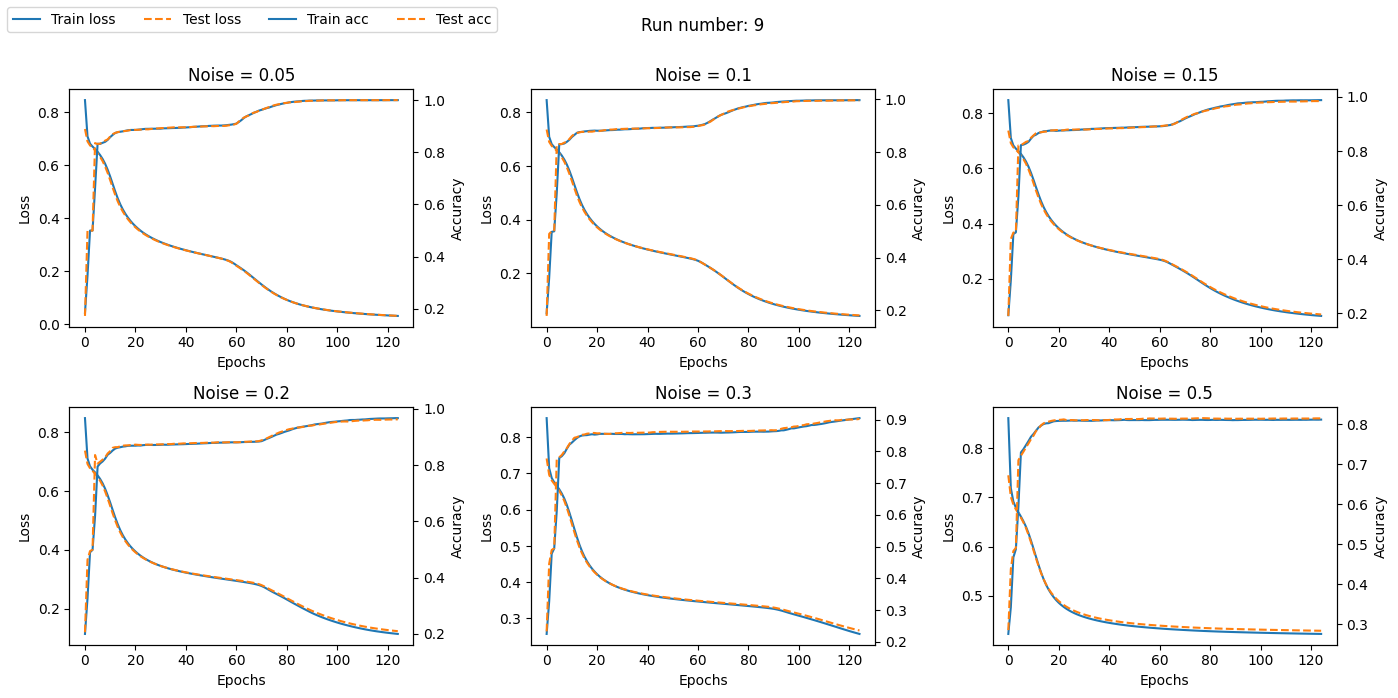

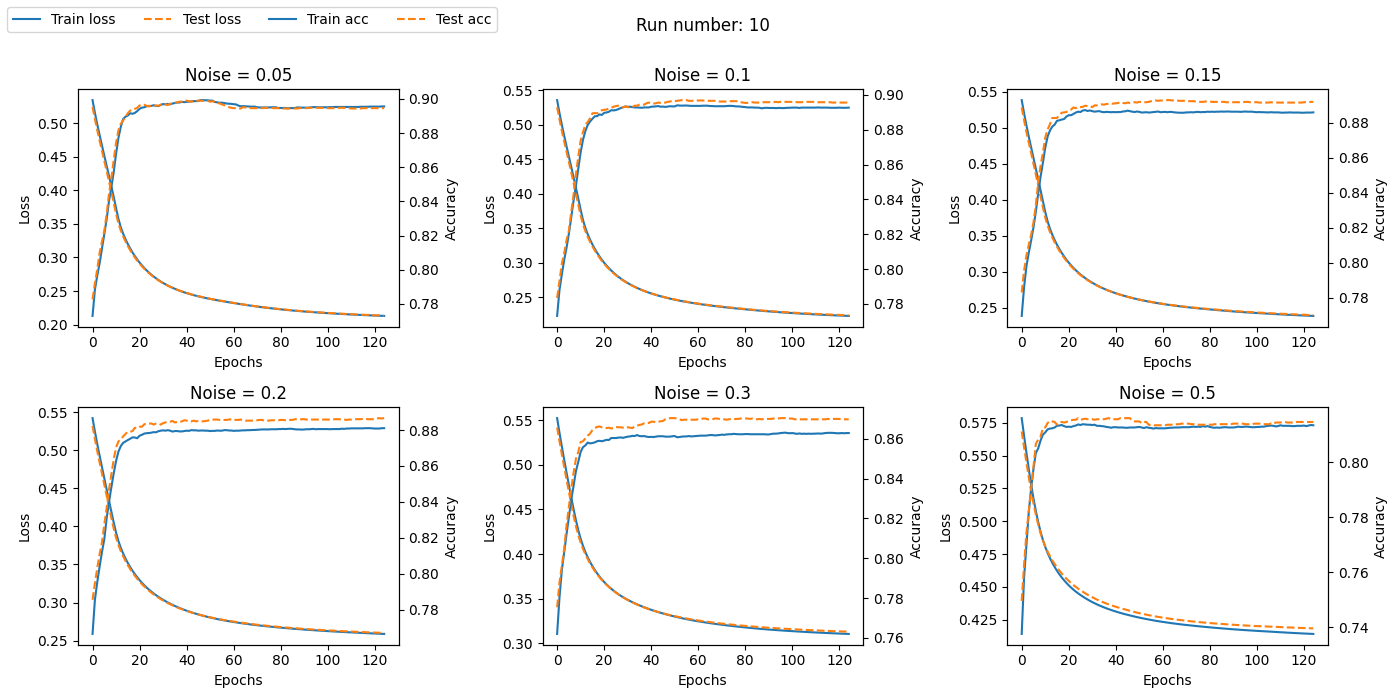

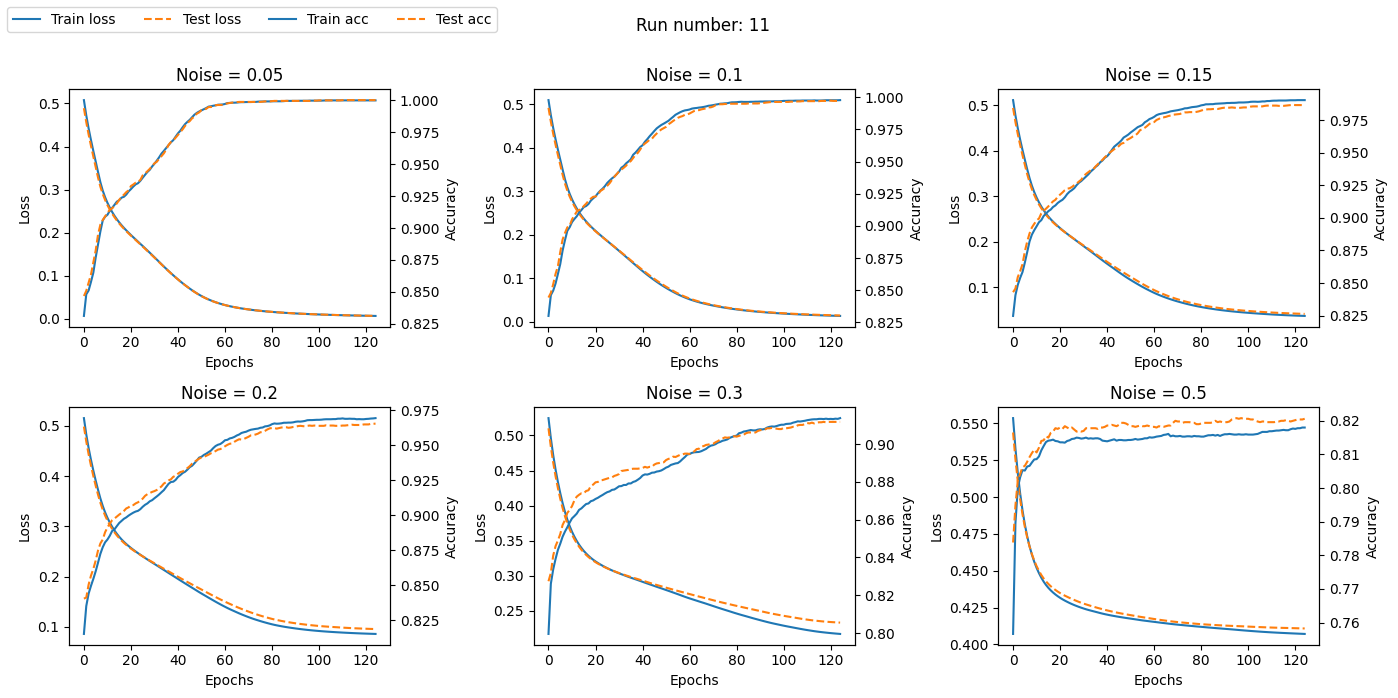

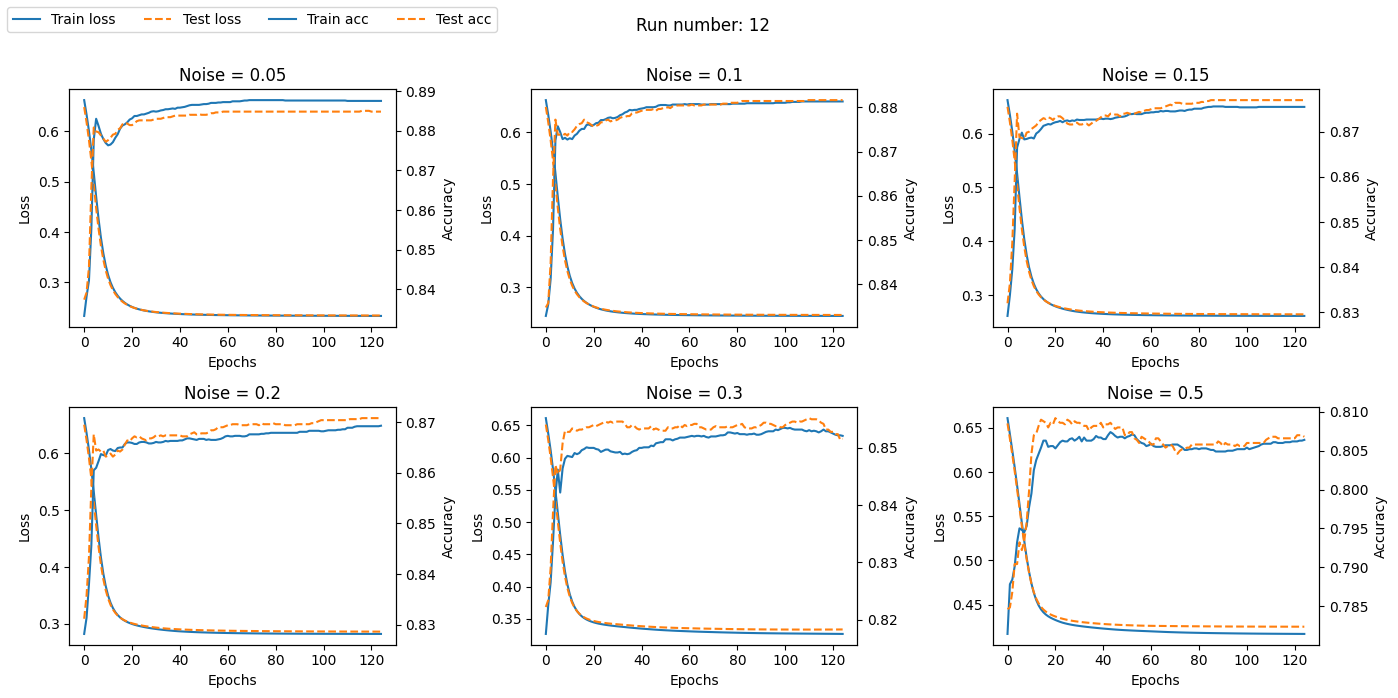

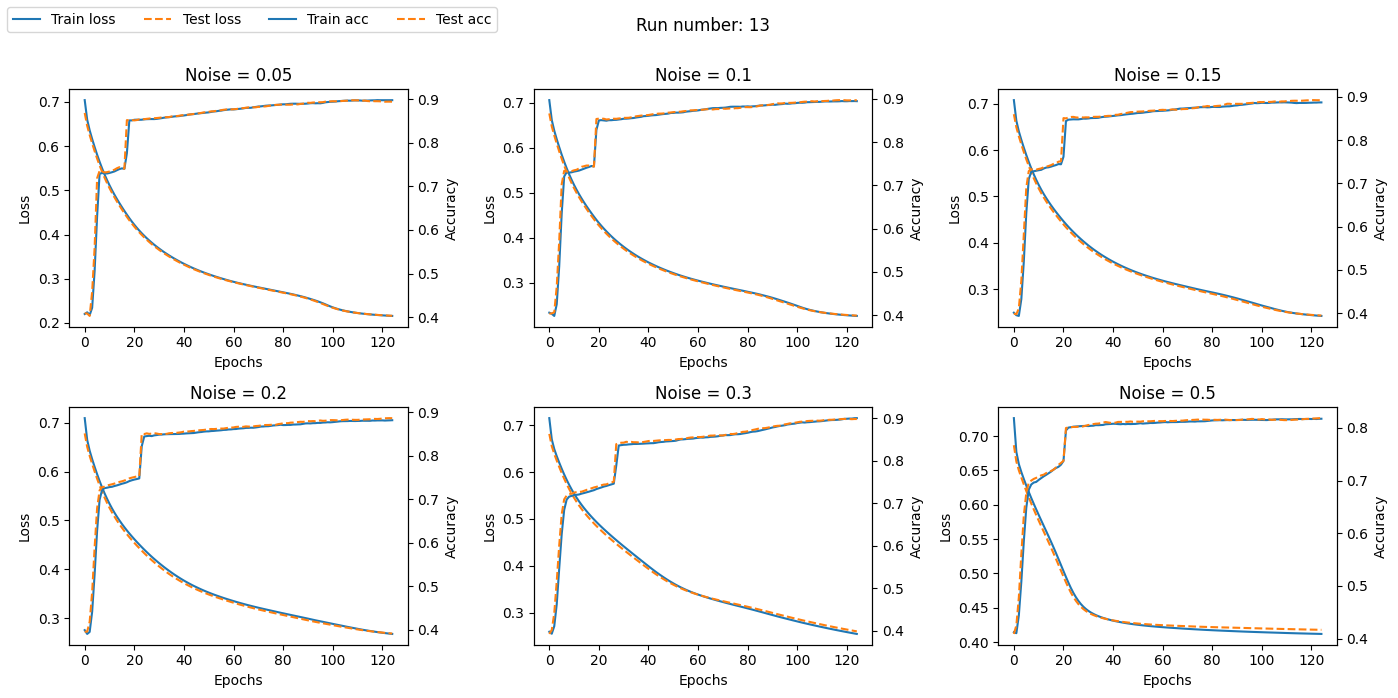

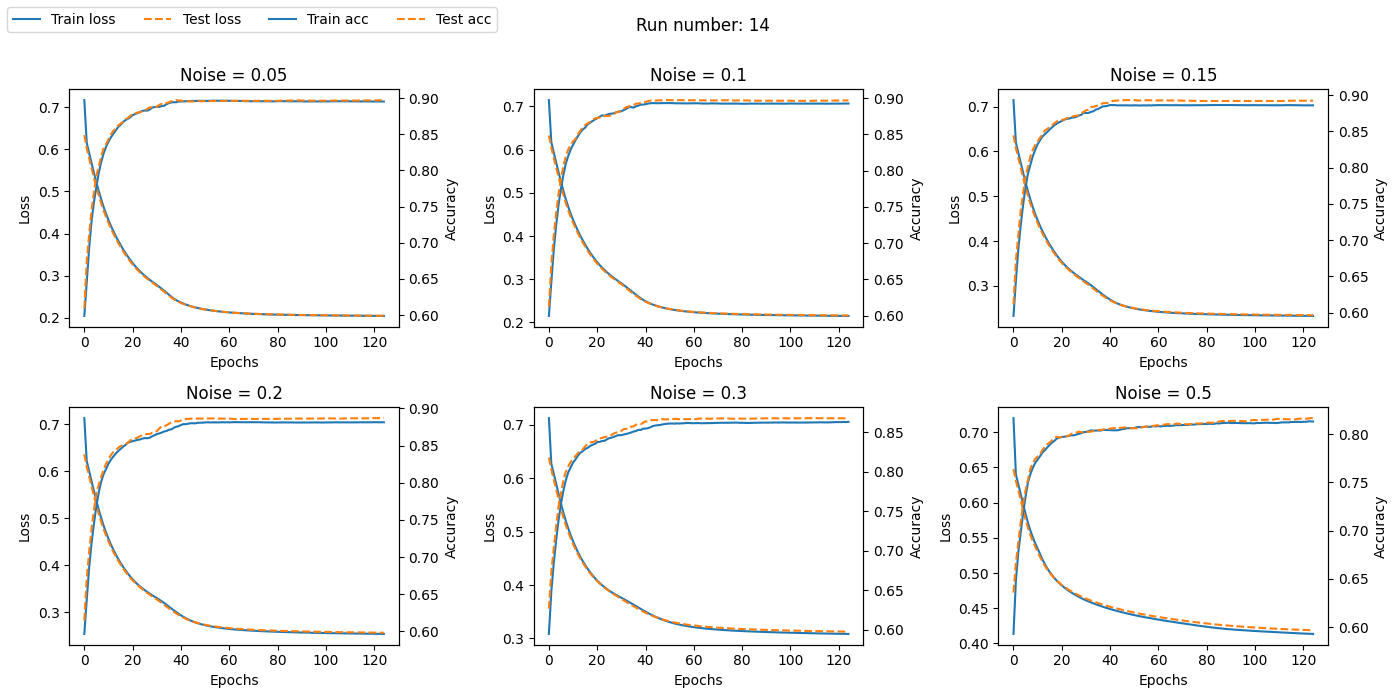

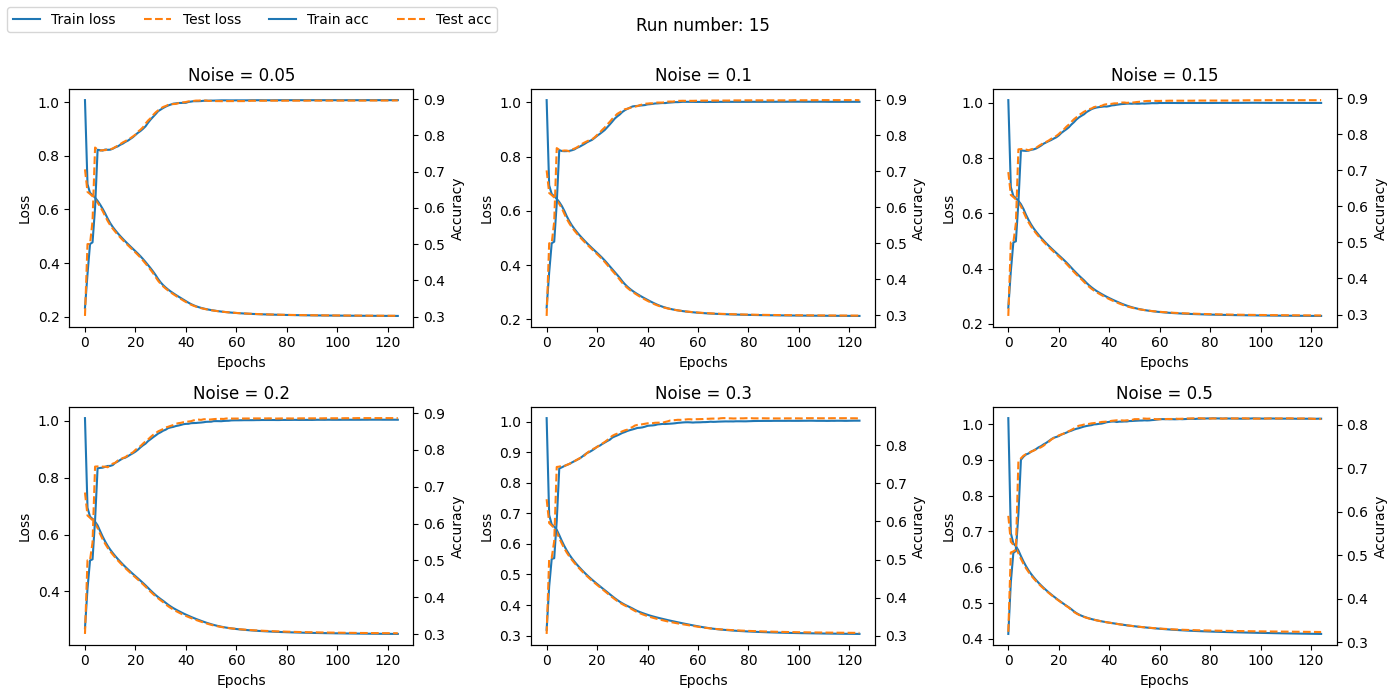

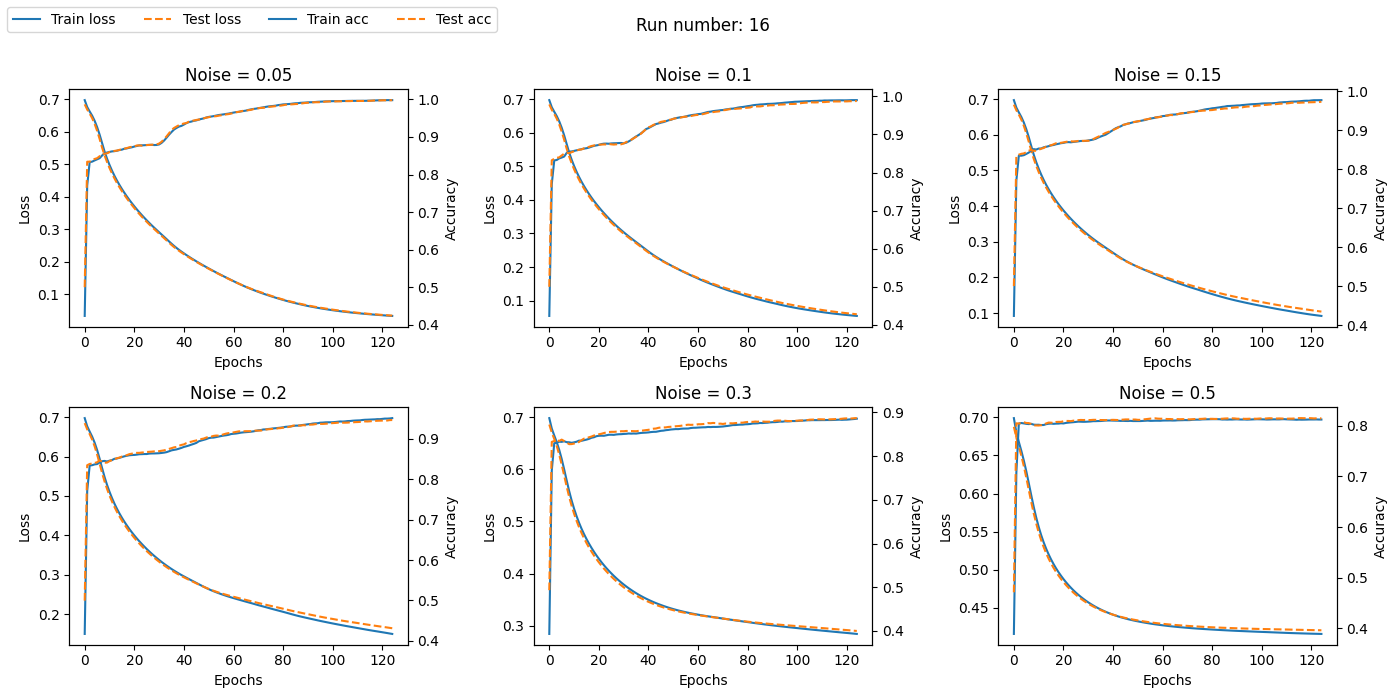

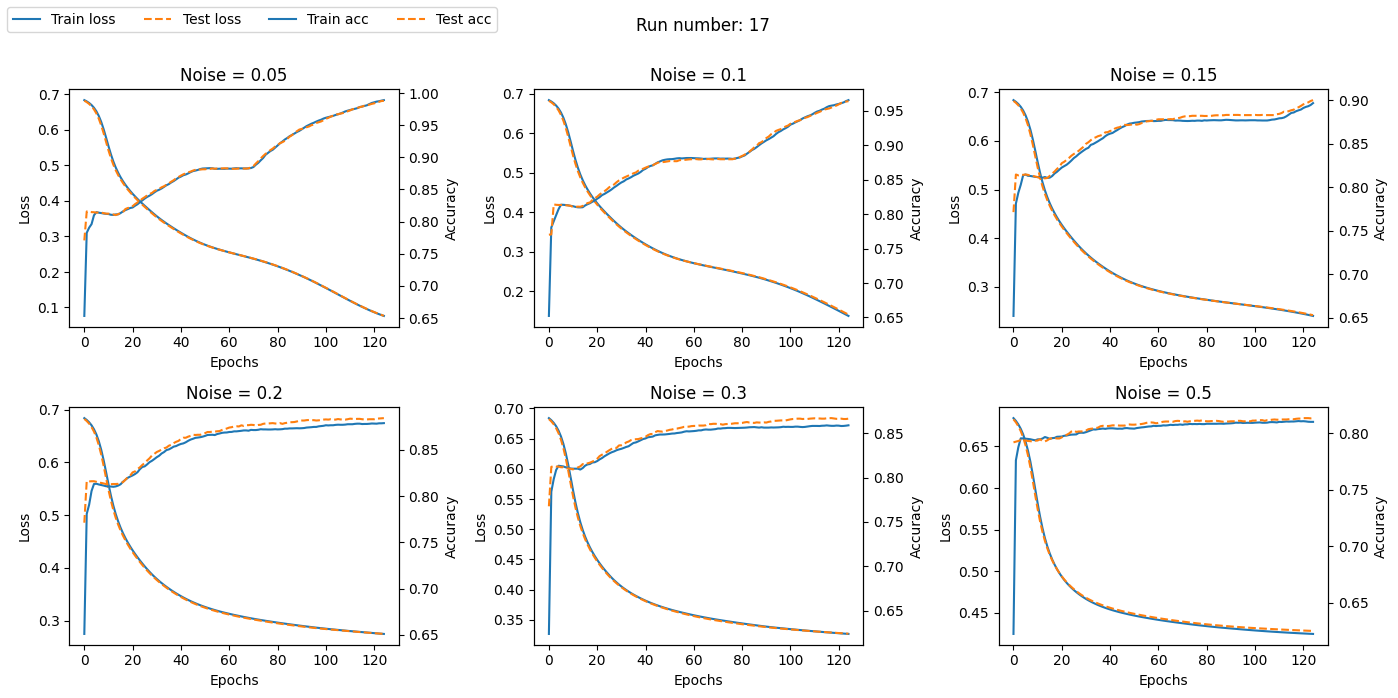

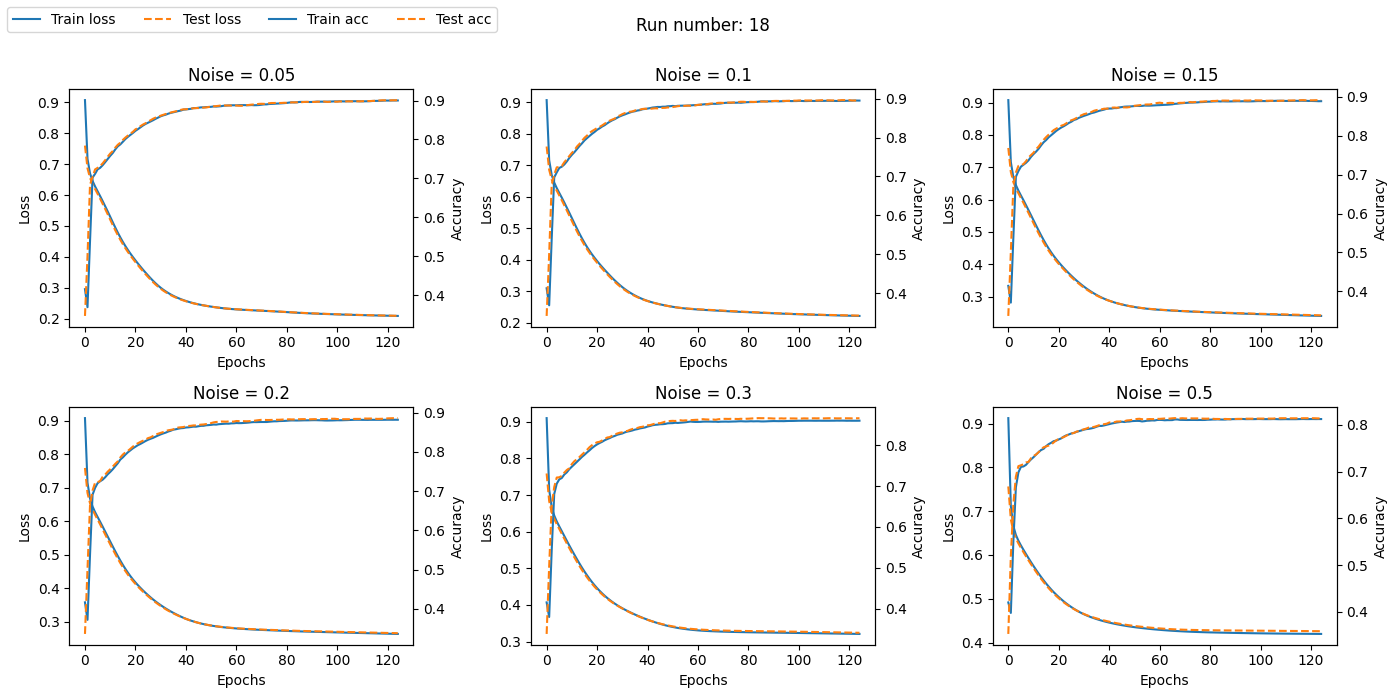

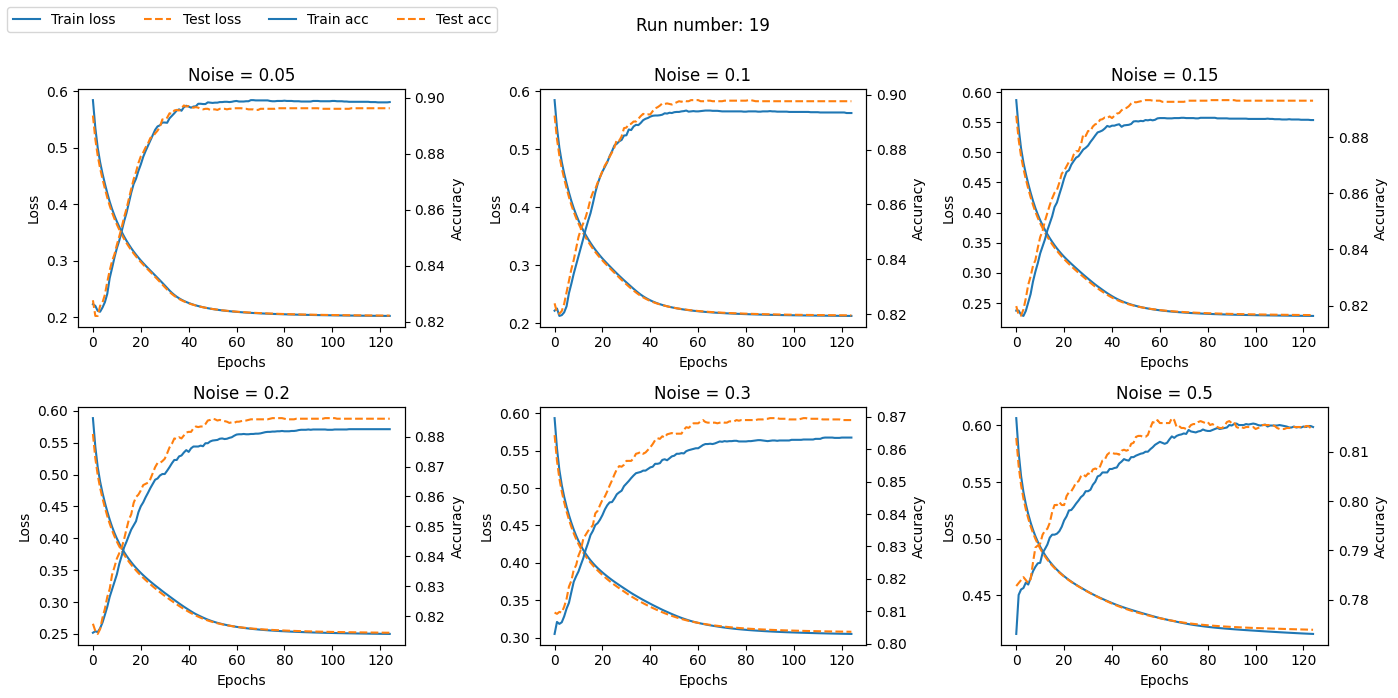

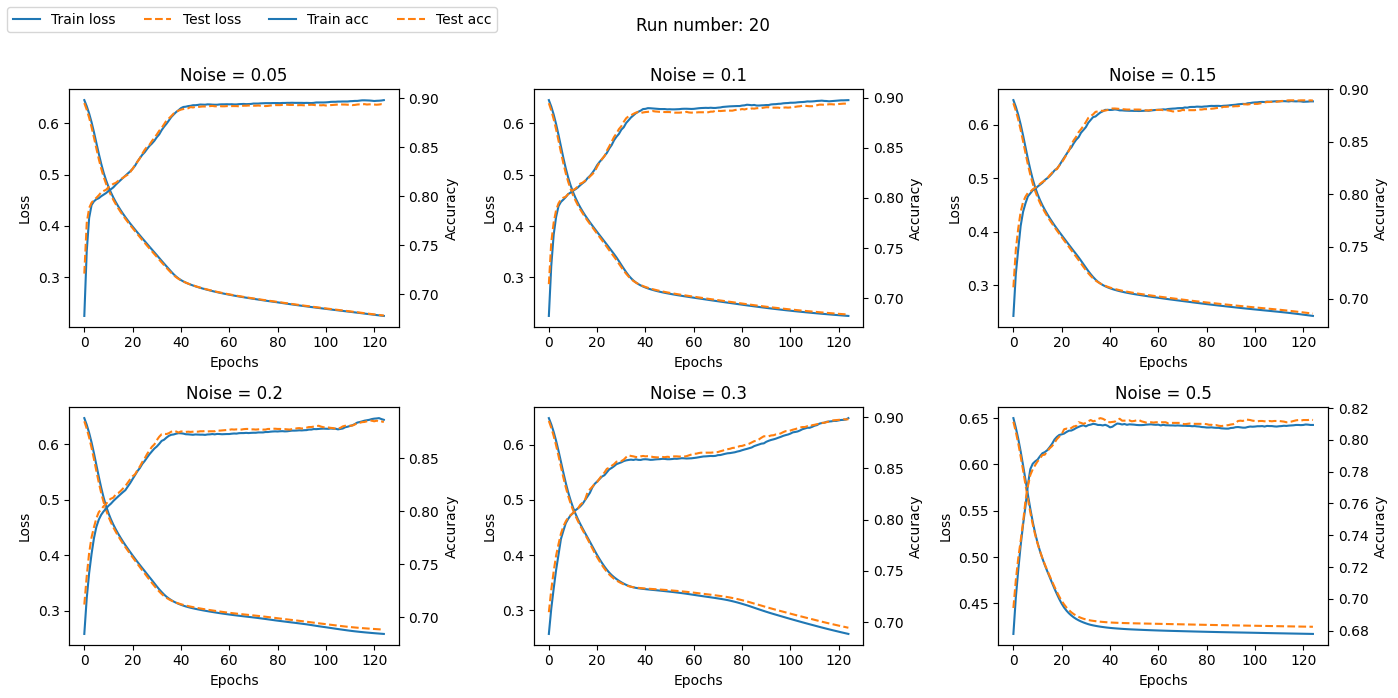

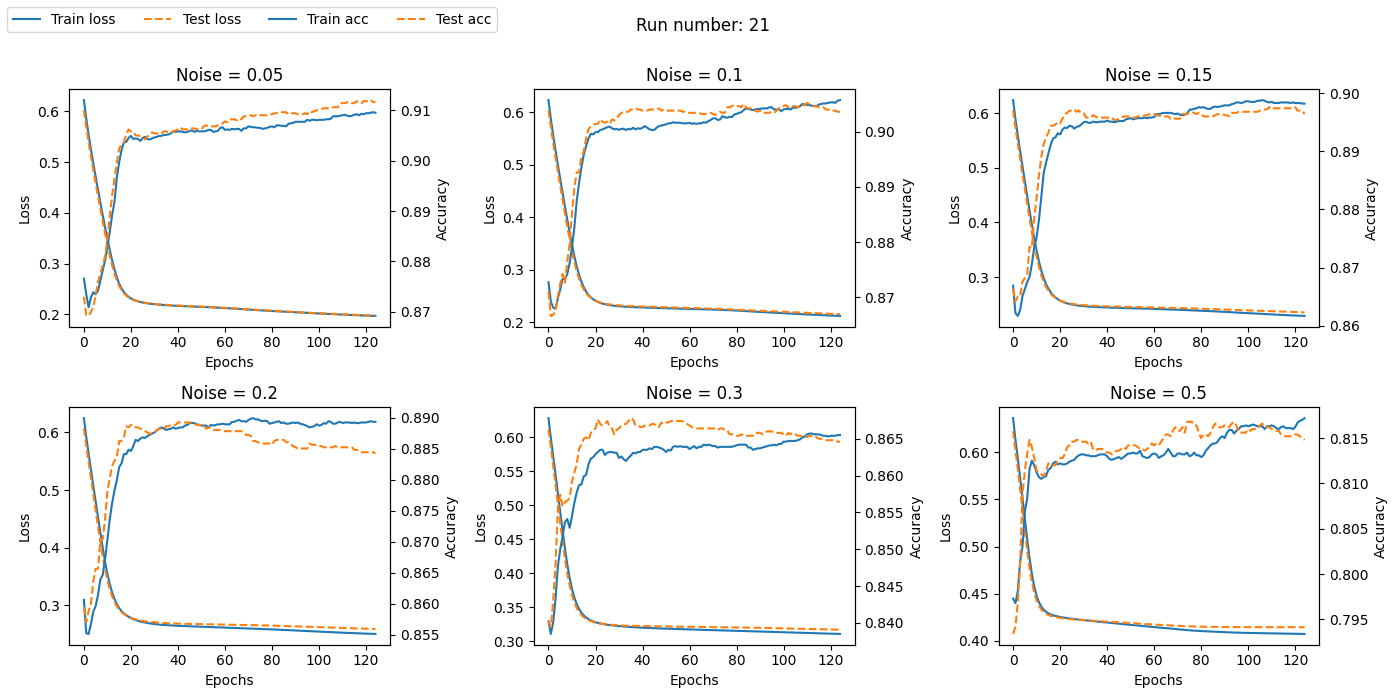

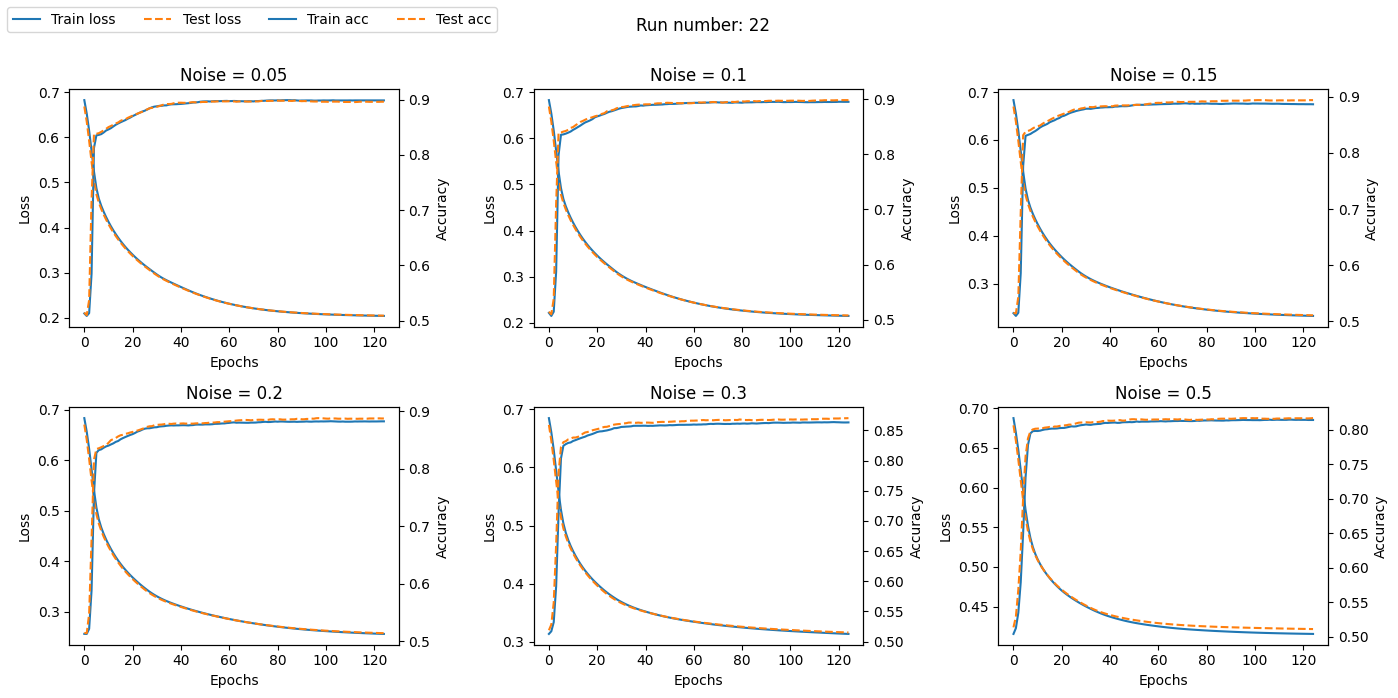

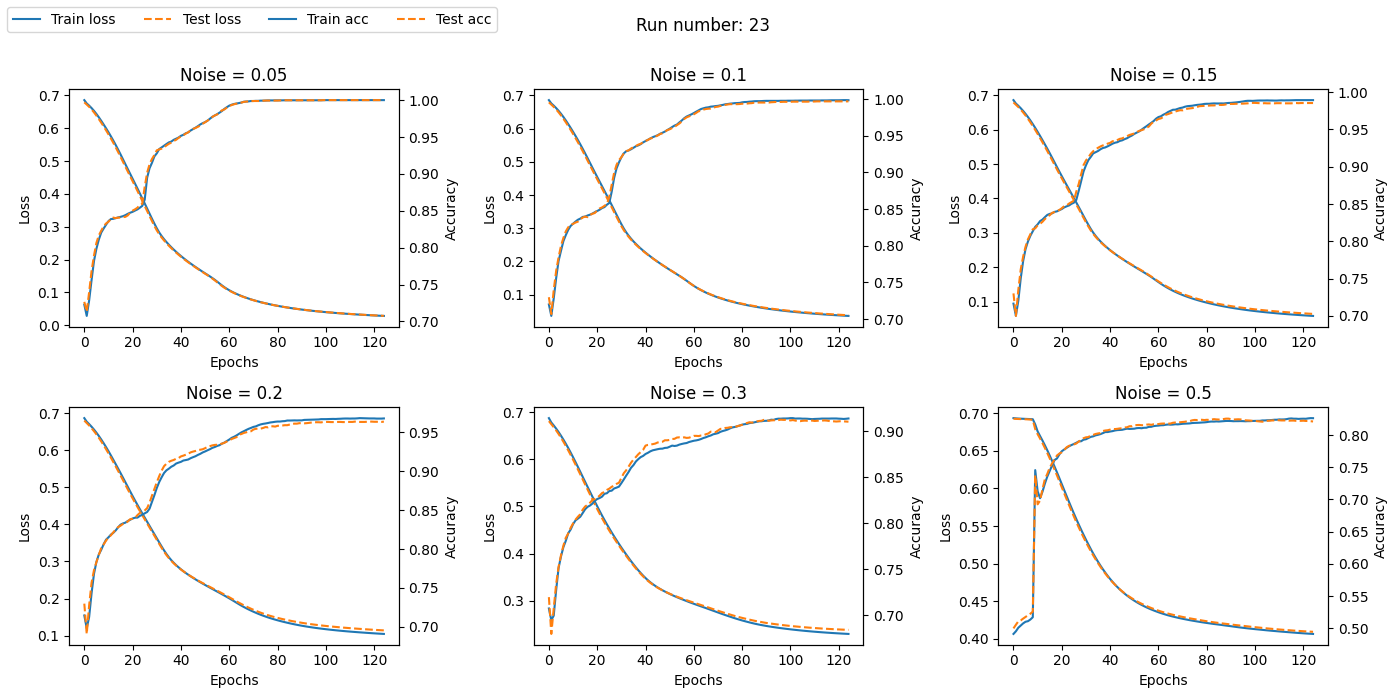

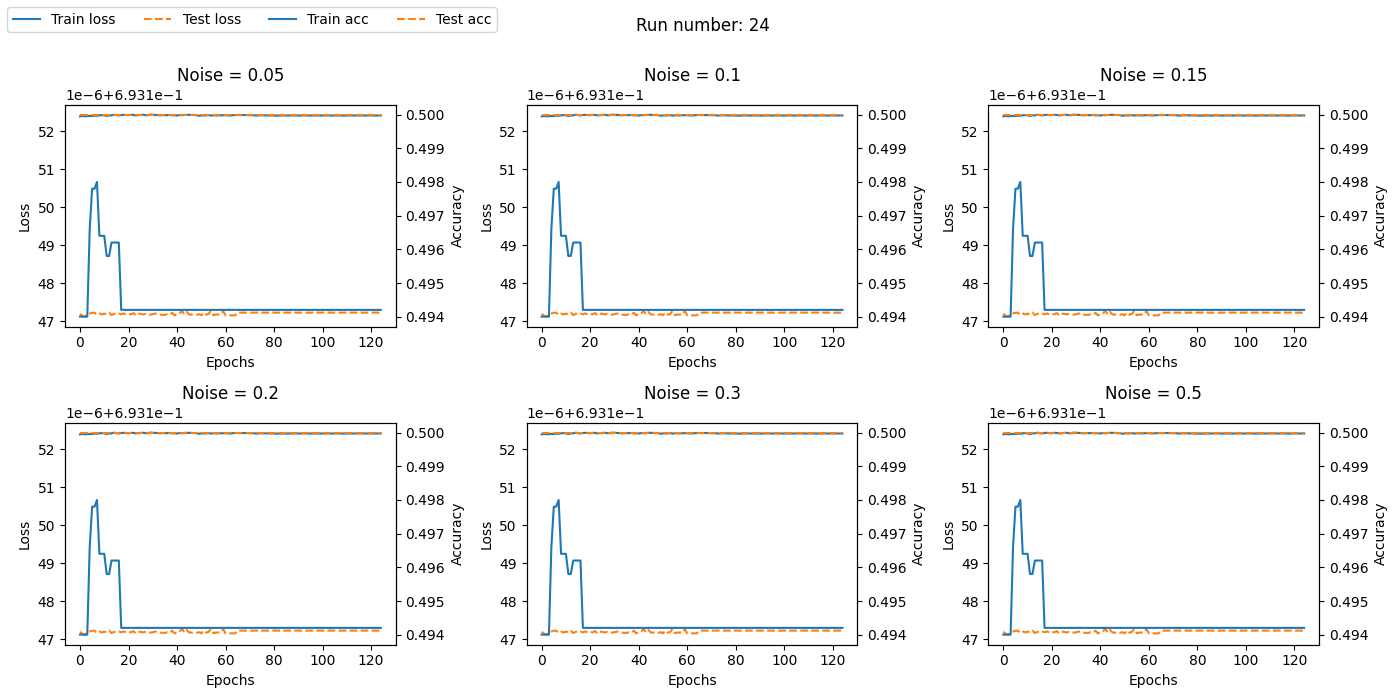

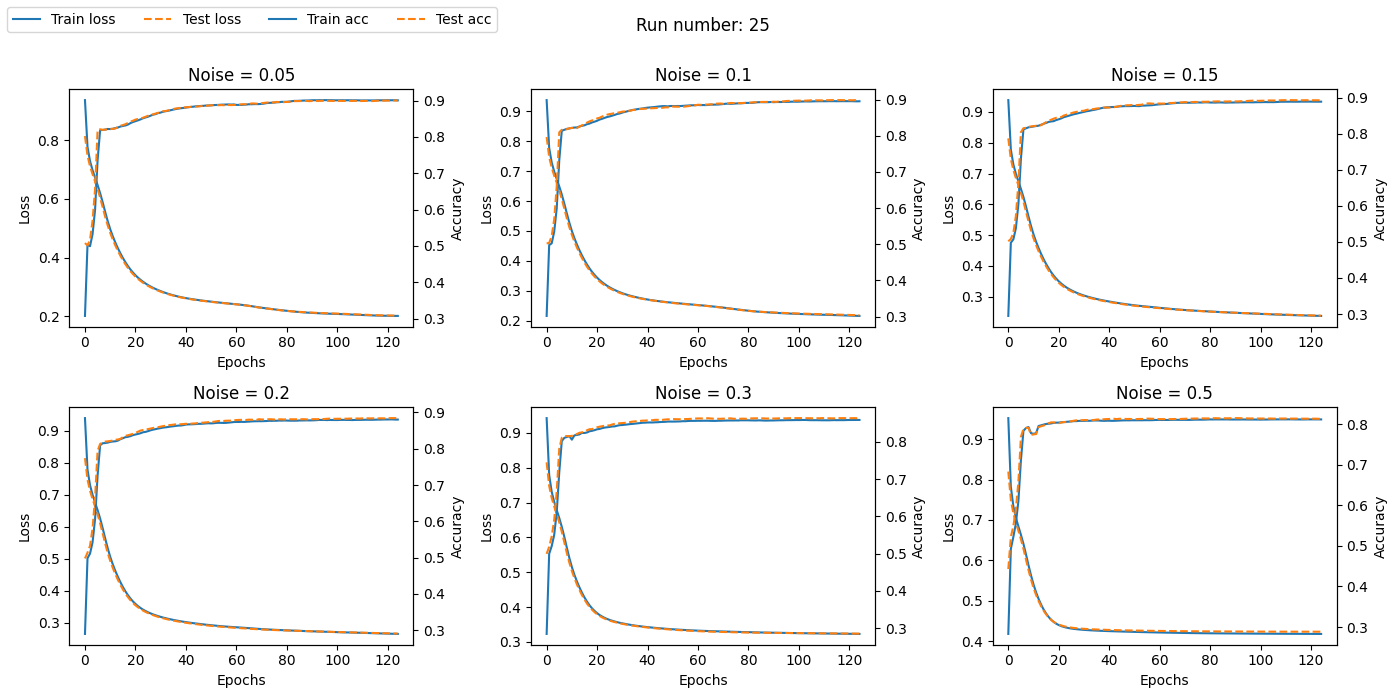

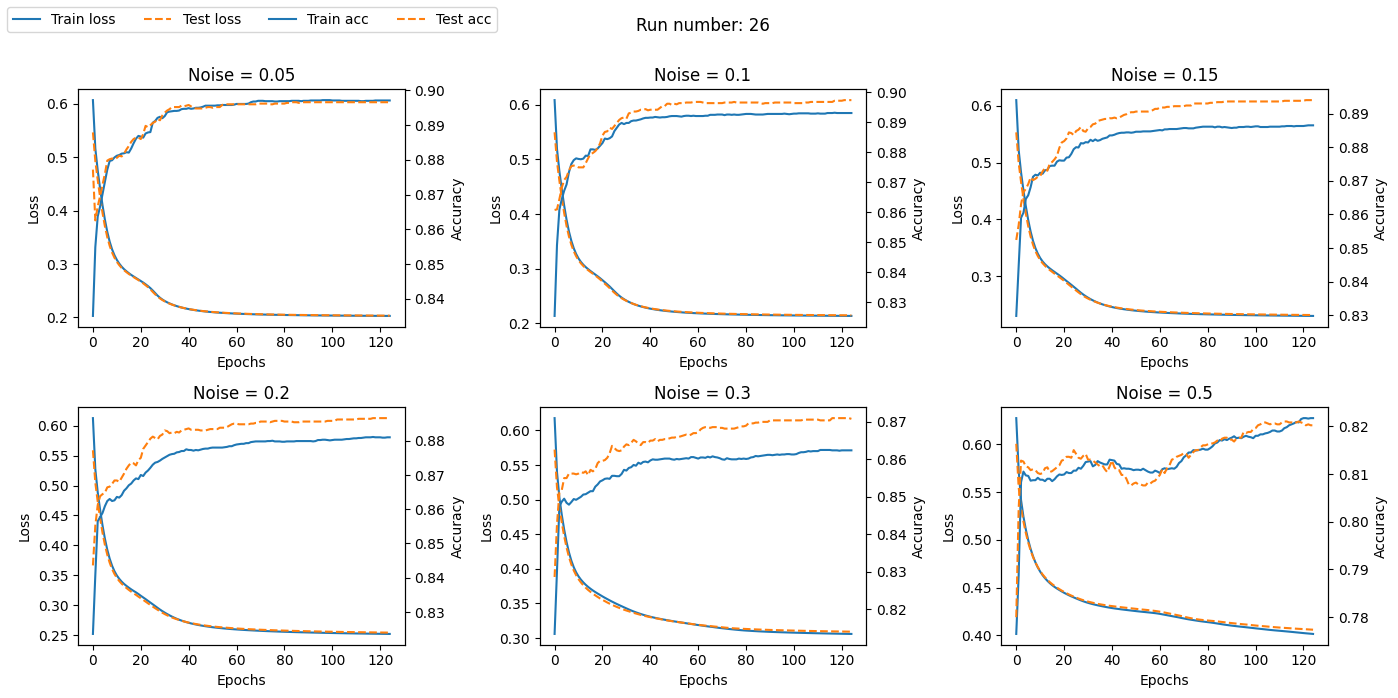

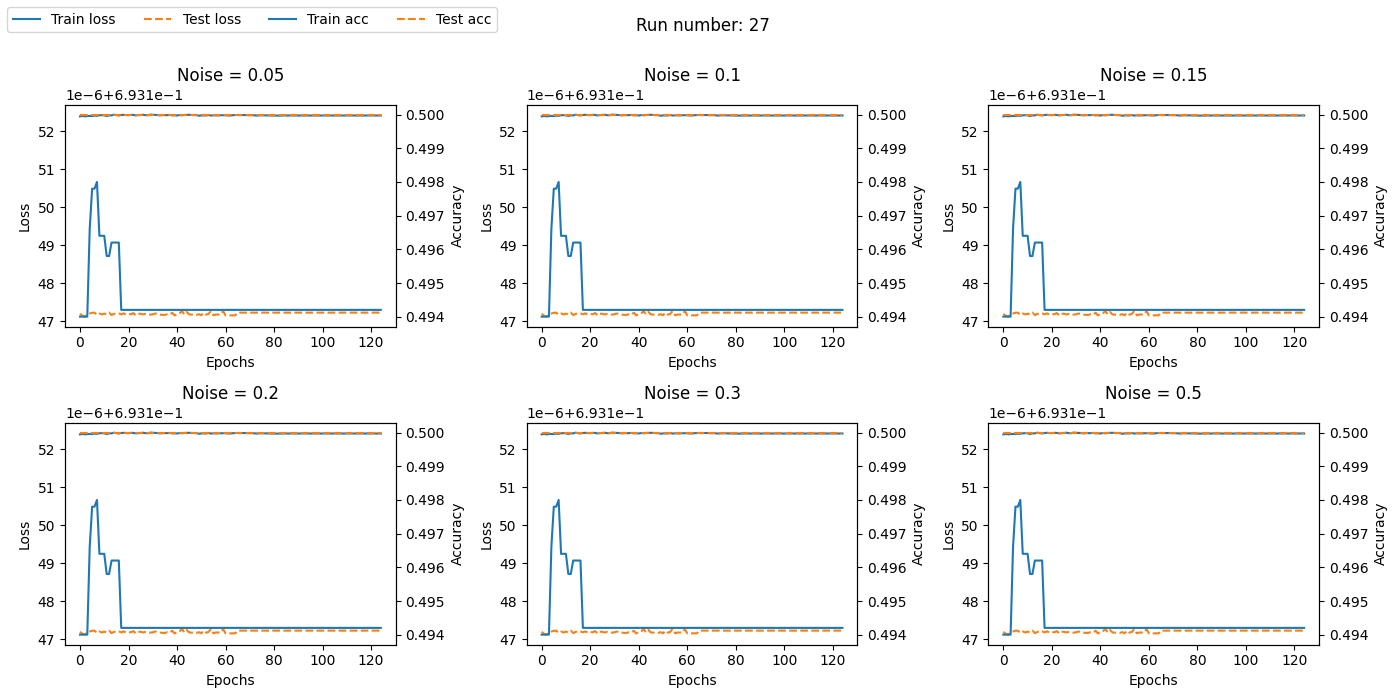

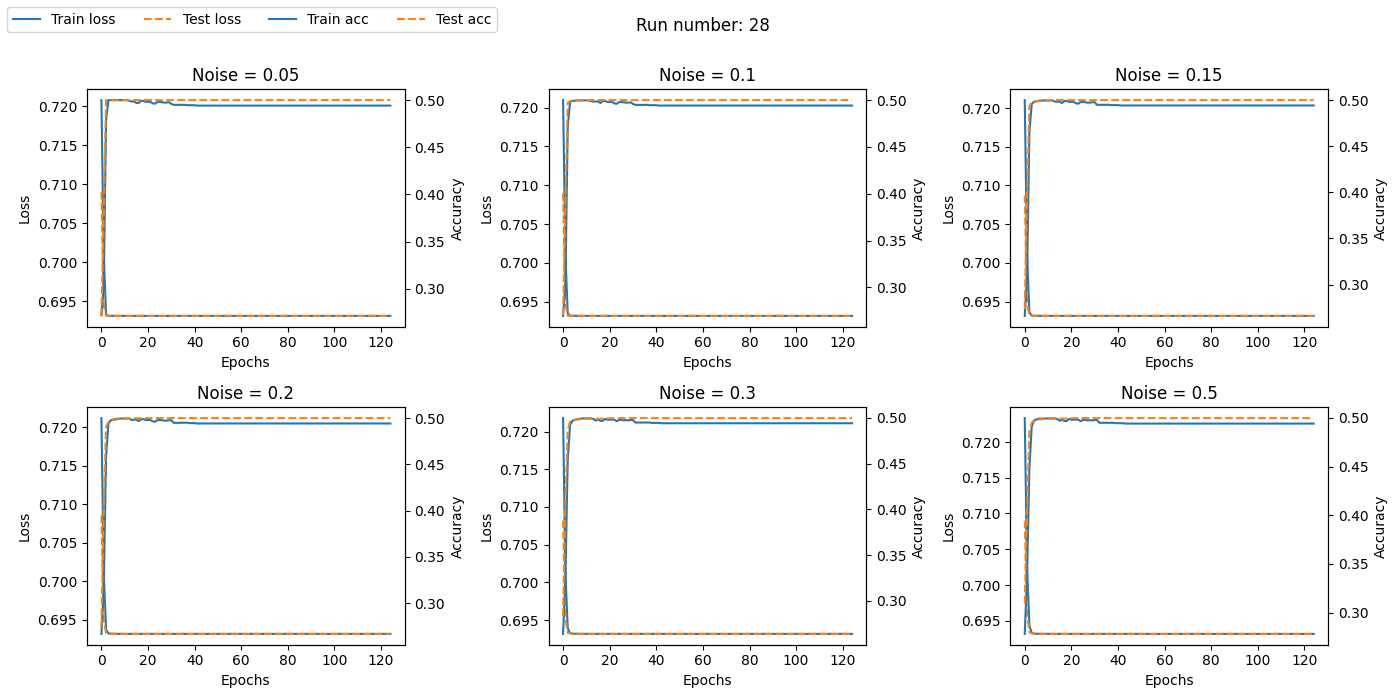

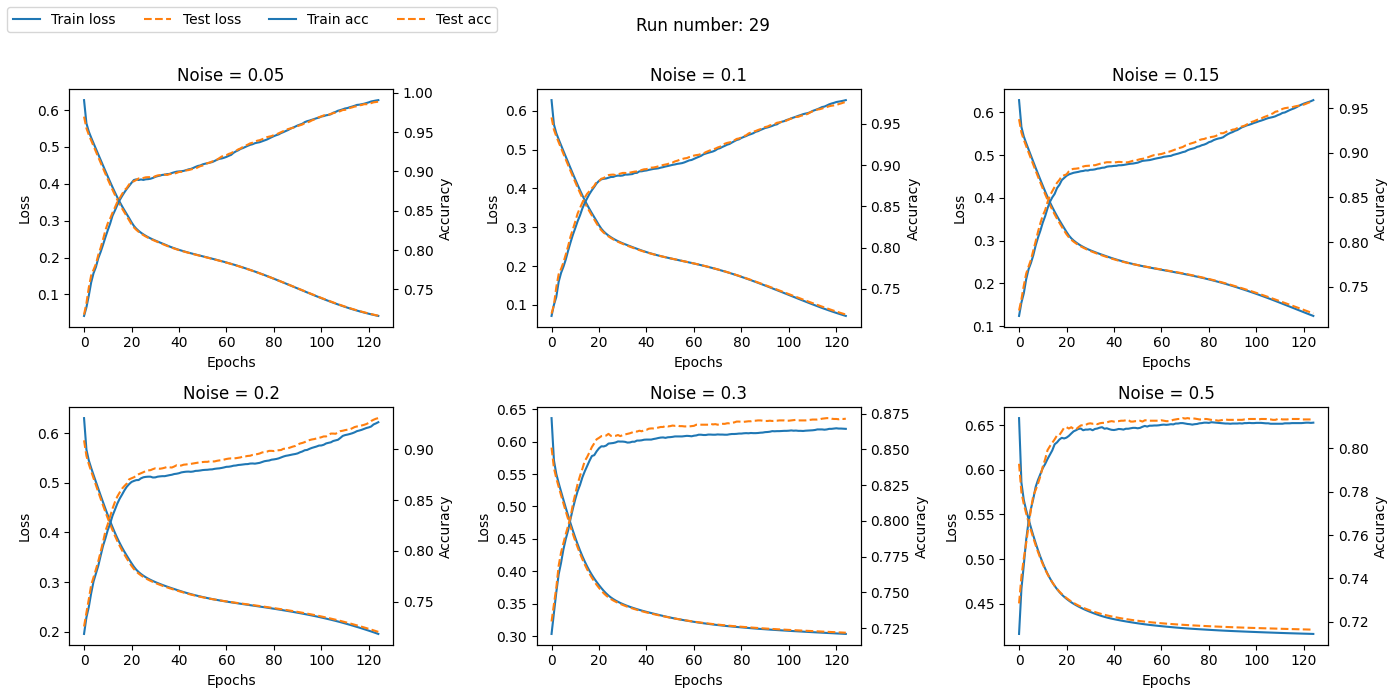

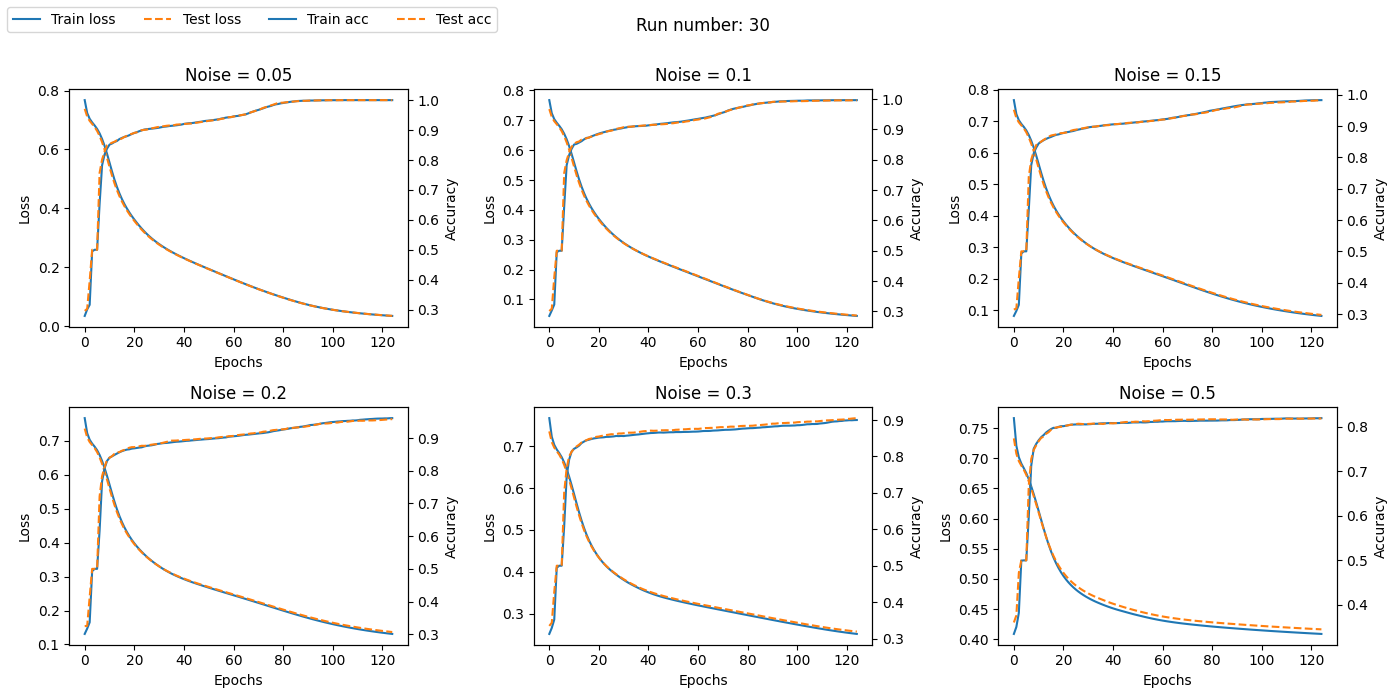

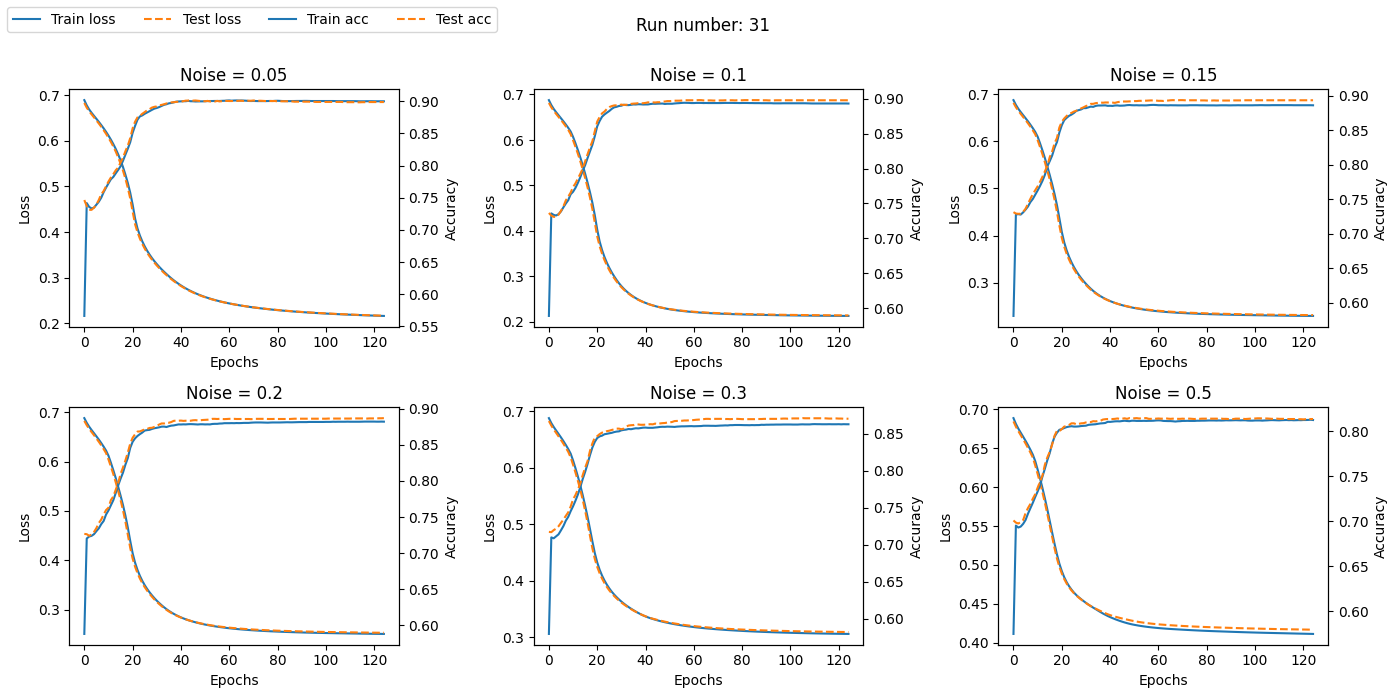

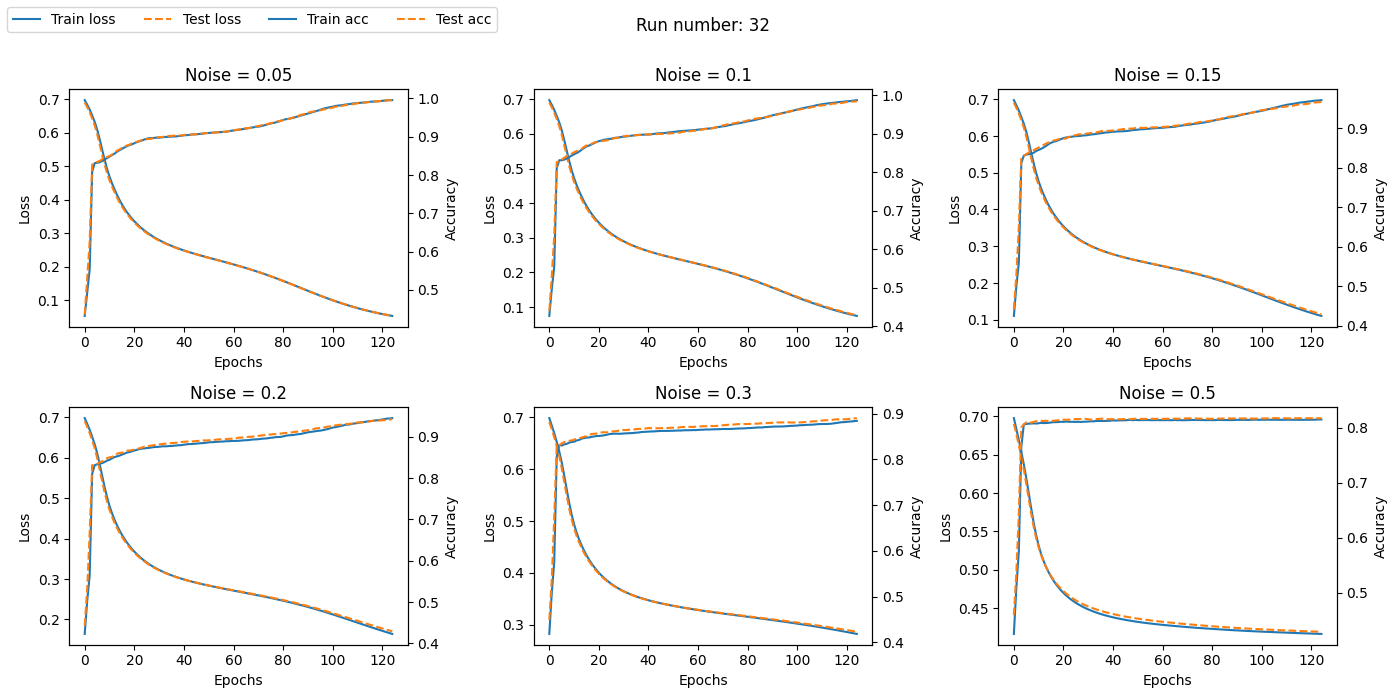

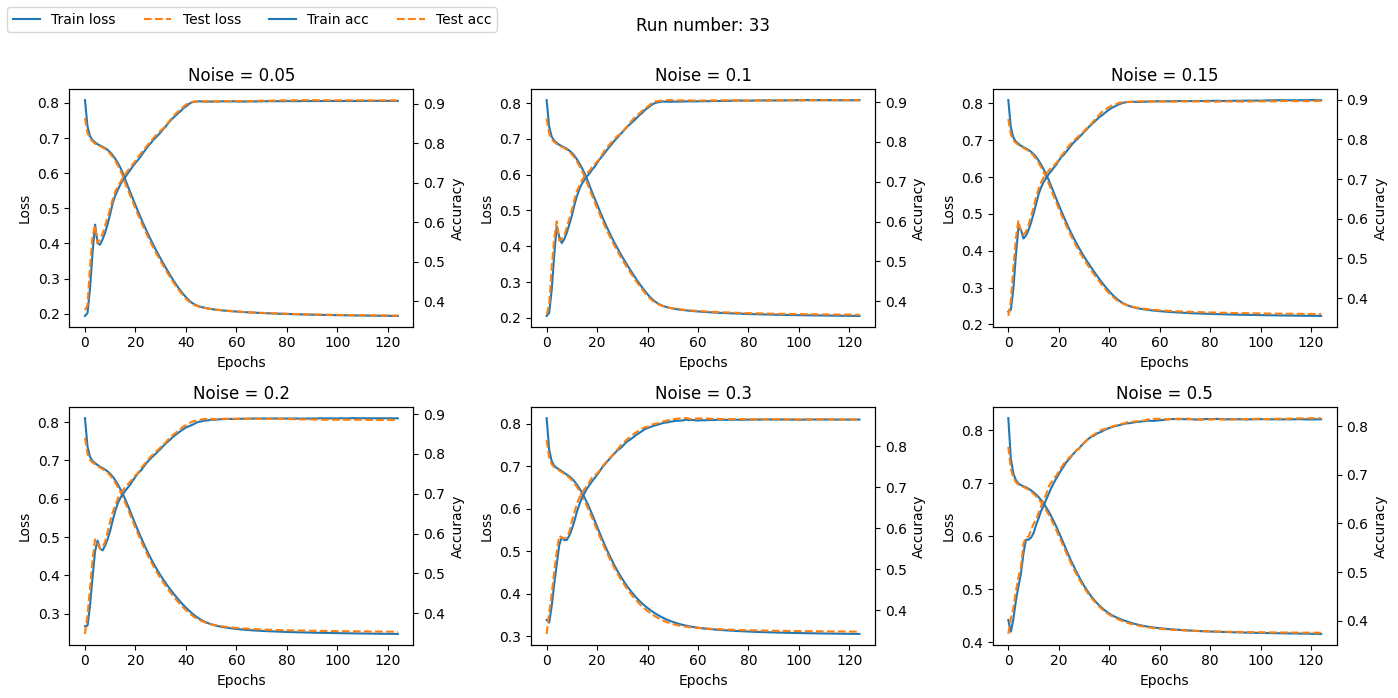

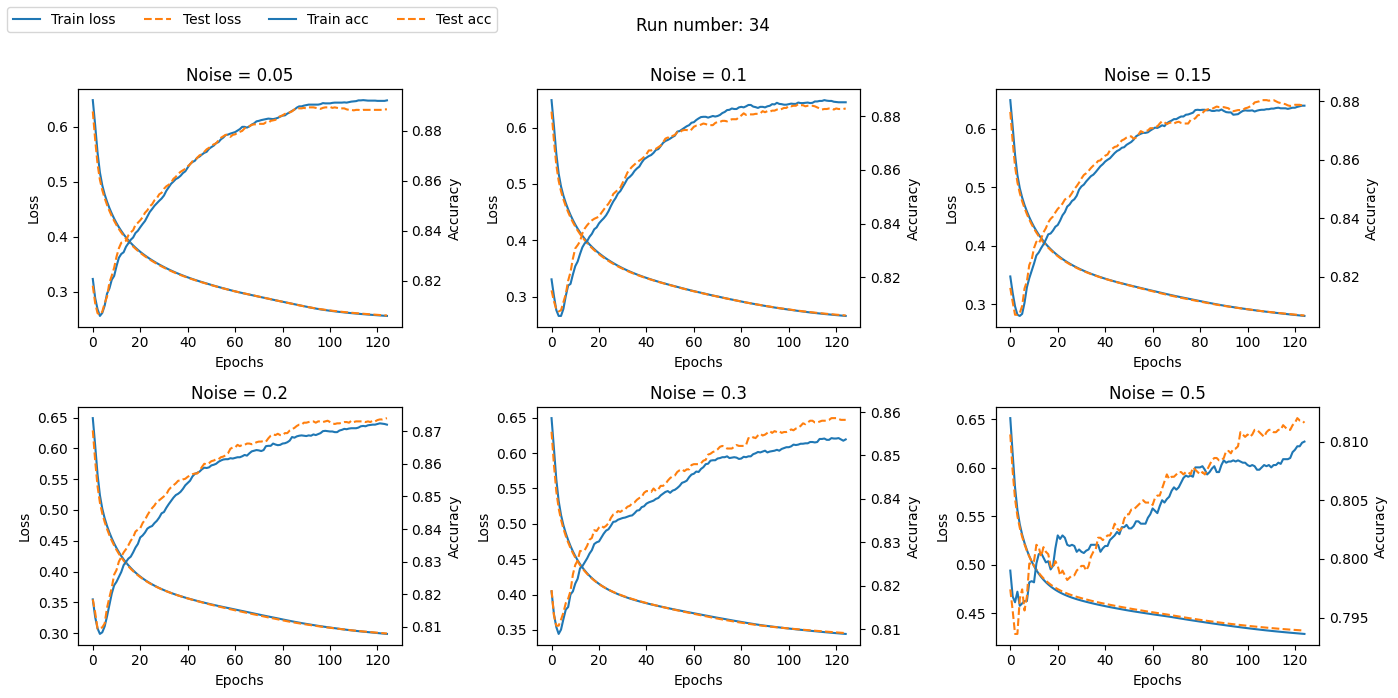

In [6]:
for i in range(35):
    plot_for_a_run(i)